### Exercise 6.2 Exploring Relationships

#### Contents

#### 1. Importing libraries and data
#### 2. Create a correlation matrix heatmap
#### 3. Create scatterplots of highly correlated variables
#### 4. Create a pair plot 

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import json

In [2]:
# Define path

path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Achievement 6\2. Data\Prepared Data'

In [3]:
#Import df
delay = pd.read_csv(os.path.join(path, 'delay seperated_csv.csv'), index_col = False)

In [4]:
#Change settings to view max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#View df
delay.head()

,Column1,year,month,carrier,carrier_name,airport,city,state,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2020,12,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,PA,Lehigh Valley International,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,1,2020,12,9E,Endeavor Air Inc.,ABY,Albany,GA,Southwest Georgia Regional,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,2,2020,12,9E,Endeavor Air Inc.,AEX,Alexandria,LA,Alexandria International,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,3,2020,12,9E,Endeavor Air Inc.,AGS,Augusta,GA,Augusta Regional at Bush Field,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,4,2020,12,9E,Endeavor Air Inc.,ALB,Albany,NY,Albany International,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


In [6]:
#Drop Column1
delay = delay.drop(columns = 'Column1')

In [7]:
#Check column was dropped
delay.head()

,year,month,carrier,carrier_name,airport,city_state,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA",Lehigh Valley International,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA",Southwest Georgia Regional,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA",Alexandria International,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA",Augusta Regional at Bush Field,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY",Albany International,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


### 2. Create a correlation matrix heatmap

In [8]:
# Create a subset of the data

sub = delay[['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct','nas_ct','security_ct', 'late_aircraft_ct',
             'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
             'security_delay', 'late_aircraft_delay']]

In [9]:
#View subset
sub.head()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


In [10]:
#Create correlation matrix of subset
sub.corr()

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
arr_flights,1.000000,0.928553,0.913941,0.728294,0.821692,0.525694,0.859181,0.602233,0.502627,0.856262,0.887762,0.583739,0.626956,0.488243,0.805749
arr_del15,0.928553,1.000000,0.925558,0.697453,0.912643,0.529340,0.949273,0.671842,0.553319,0.960250,0.908416,0.577848,0.786261,0.481855,0.924312
carrier_ct,0.913941,0.925558,1.000000,0.687277,0.741848,0.550511,0.870981,0.585325,0.466475,0.851834,0.919436,0.549295,0.583769,0.513184,0.808160
weather_ct,0.728294,0.697453,0.687277,1.000000,0.598149,0.329421,0.625493,0.503454,0.463821,0.731967,0.769016,0.897765,0.488492,0.282234,0.647713
nas_ct,0.821692,0.912643,0.741848,0.598149,1.000000,0.423072,0.777828,0.619514,0.540636,0.901357,0.775503,0.498362,0.925514,0.381245,0.795063
security_ct,0.525694,0.529340,0.550511,0.329421,0.423072,1.000000,0.513015,0.402688,0.286795,0.449359,0.472459,0.256770,0.286684,0.888843,0.454432
late_aircraft_ct,0.859181,0.949273,0.870981,0.625493,0.777828,0.513015,1.000000,0.655199,0.516651,0.909199,0.845924,0.524710,0.649920,0.463641,0.962579
arr_cancelled,0.602233,0.671842,0.585325,0.503454,0.619514,0.402688,0.655199,1.000000,0.503220,0.704064,0.646280,0.521260,0.601308,0.362371,0.657545
arr_diverted,0.502627,0.553319,0.466475,0.463821,0.540636,0.286795,0.516651,0.503220,1.000000,0.579066,0.507438,0.431190,0.509056,0.271096,0.548907
arr_delay,0.856262,0.960250,0.851834,0.731967,0.901357,0.449359,0.909199,0.704064,0.579066,1.000000,0.926717,0.663042,0.843818,0.402837,0.948945


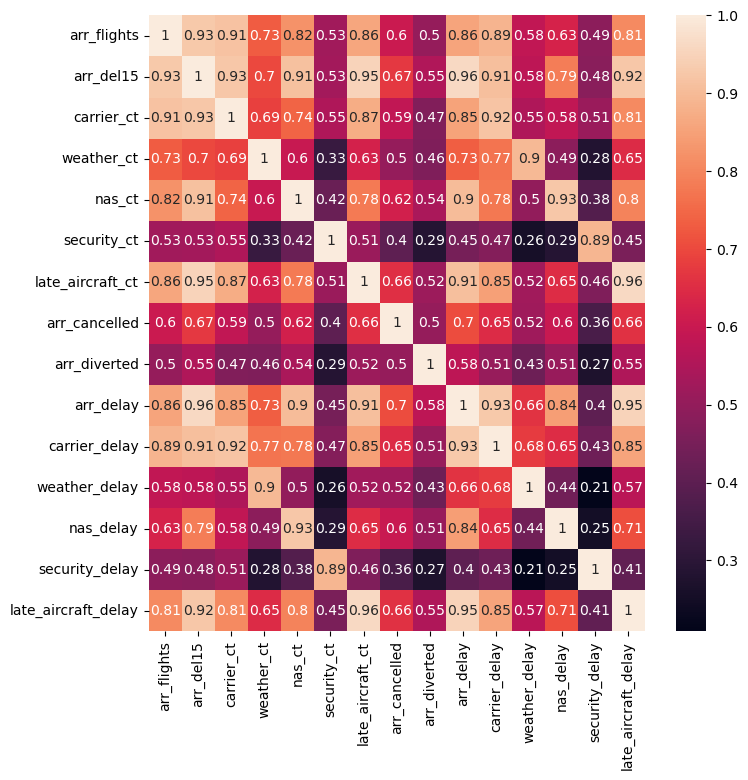

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

###### The coefficients represent the level of interdependence between the variables. This is based on the following scale: 

###### 0: no relationship
###### 0.1–0.3: weak relationship
###### 0.3–0.5: moderate relationship
###### 0.5–1.0: strong relationship

###### For this data I will be picking out variables that have a strong relationship and are related to my project questions. 
###### The variables that stand out to me so far are:
###### arr_flights x carrier_ct = 0.91
###### arr_flights x arr_delay15 = 0.93
###### arr_del15 x carrier_ct = 0.93
###### arr_flights x carrier delay = 0.89
###### arr_flights x arr_delay = 0.86
###### arr_flights x nas_ct = 0.82
###### arr_delay x nas_ct  = 0.9
###### nas_ct x arr_del15 = 0.91
###### arr_flights x late_aircraft_ct = 0.86


### 3. Create scatterplots of highly correlated variables

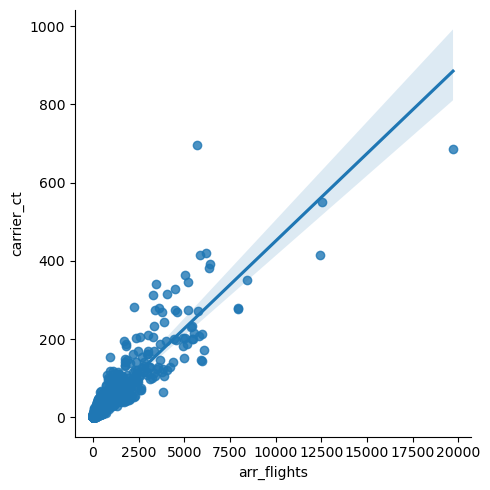

In [12]:
# Create a scatterplot for the "arr_flights" and "carrier_ct" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'carrier_ct', data = delay)

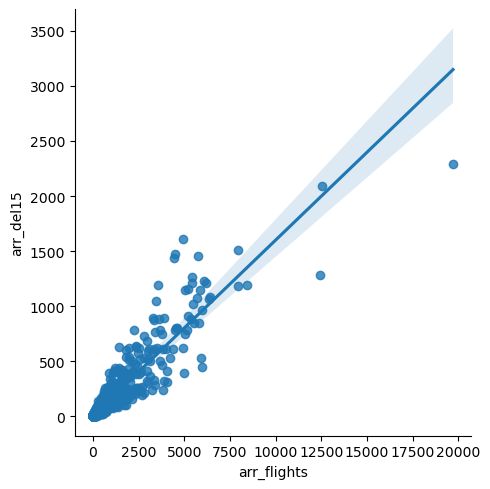

In [13]:
# Create a scatterplot for the "arr_flights" and "arr_del15" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'arr_del15', data = delay)

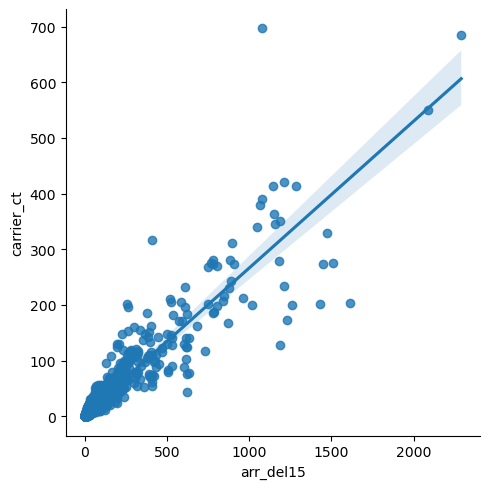

In [14]:
# Create a scatterplot for the "arr_del15" and "carrier_ct" columns in seaborn

sns.lmplot(x = 'arr_del15', y = 'carrier_ct', data = delay)

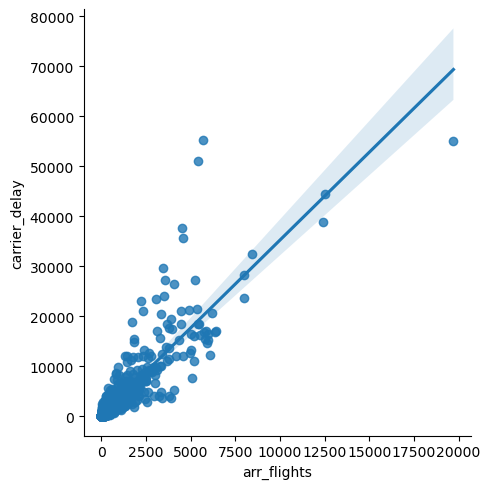

In [15]:
# Create a scatterplot for the "arr_flights" and "carrier_delay" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'carrier_delay', data = delay)

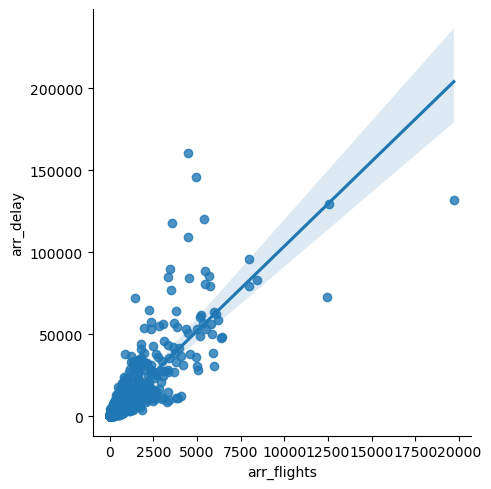

In [16]:
# Create a scatterplot for the "arr_flights" and "arr_delay" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'arr_delay', data = delay)

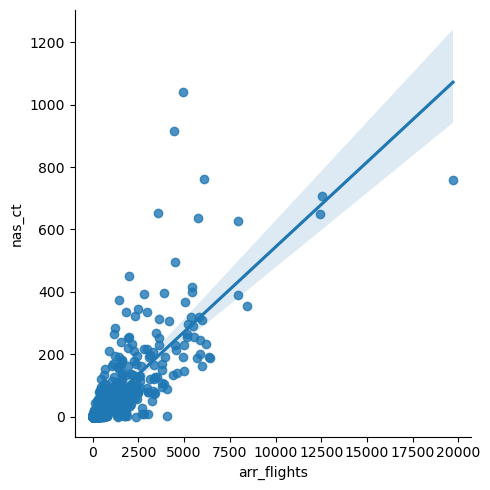

In [17]:
# Create a scatterplot for the "arr_flights" and "nas_ct" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'nas_ct', data = delay)

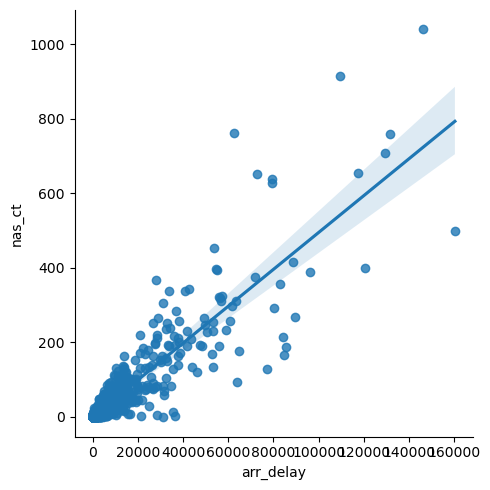

In [18]:
# Create a scatterplot for the "arr_delay" and "nas_ct" columns in seaborn

sns.lmplot(x = 'arr_delay', y = 'nas_ct', data = delay)

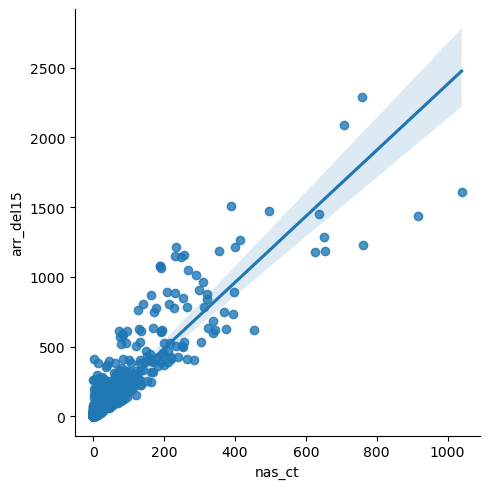

In [19]:
# Create a scatterplot for the "nas_ct" and "arr_del15" columns in seaborn

sns.lmplot(x = 'nas_ct', y = 'arr_del15', data = delay)

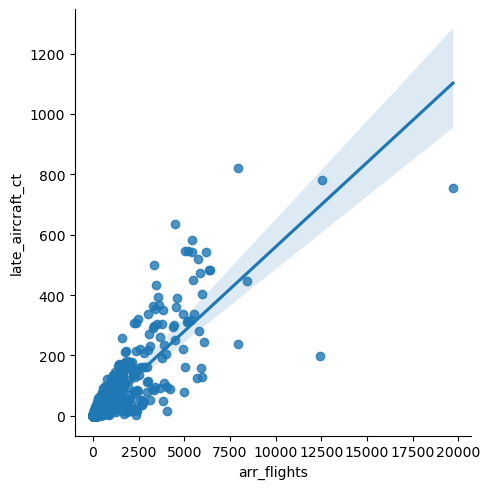

In [20]:
# Create a scatterplot for the "arr_flights" and "late_aircraft_ct" columns in seaborn

sns.lmplot(x = 'arr_flights', y = 'late_aircraft_ct', data = delay)

Looking at these scatter plots we see the following are fairly closely correlated:
"arr_flights x carrier_ct = 0.91" and "arr_flights x arr_delay15 = 0.93" hold close to the trend line up to 7500 arriving flights. Also, "arr_del15 x carrier_ct = 0.93" is close to the trend line up to 1000 flight delayed more than 15 minutes. 

The following scatter plots all share a similar trend, "arr_flights x carrier delay = 0.89", "arr_flights x arr_delay = 0.86", "arr_flights x nas_ct = 0.82", and "arr_flights x late_aircraft_ct = 0.86" where the are several instances where the total delay time is increasing not in proportion to the x variable. For example, in "arr_flights x carrier delay" there are several data points above the trend line where the total delay time due to the carrier is much higher than expected based on the number of flights. This pattern follows in the other scatter plots listed as well. This means that while the more arriving flights there are, the more likely there is to be a delay, is not always true, as each of these factors (carrier delay, National Aviation System Delay (nas_ct), and late aircraft count can cause higher than expected delay times based on the number of flights. i.e. There are times when the delay time is increased more than expected based on the number of arriving flights.

### 4. Create a pair plot 

In [21]:
# Create another subset to use in a pair plot of number of flights delayed due to various reasons

sub_2 = sub[['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

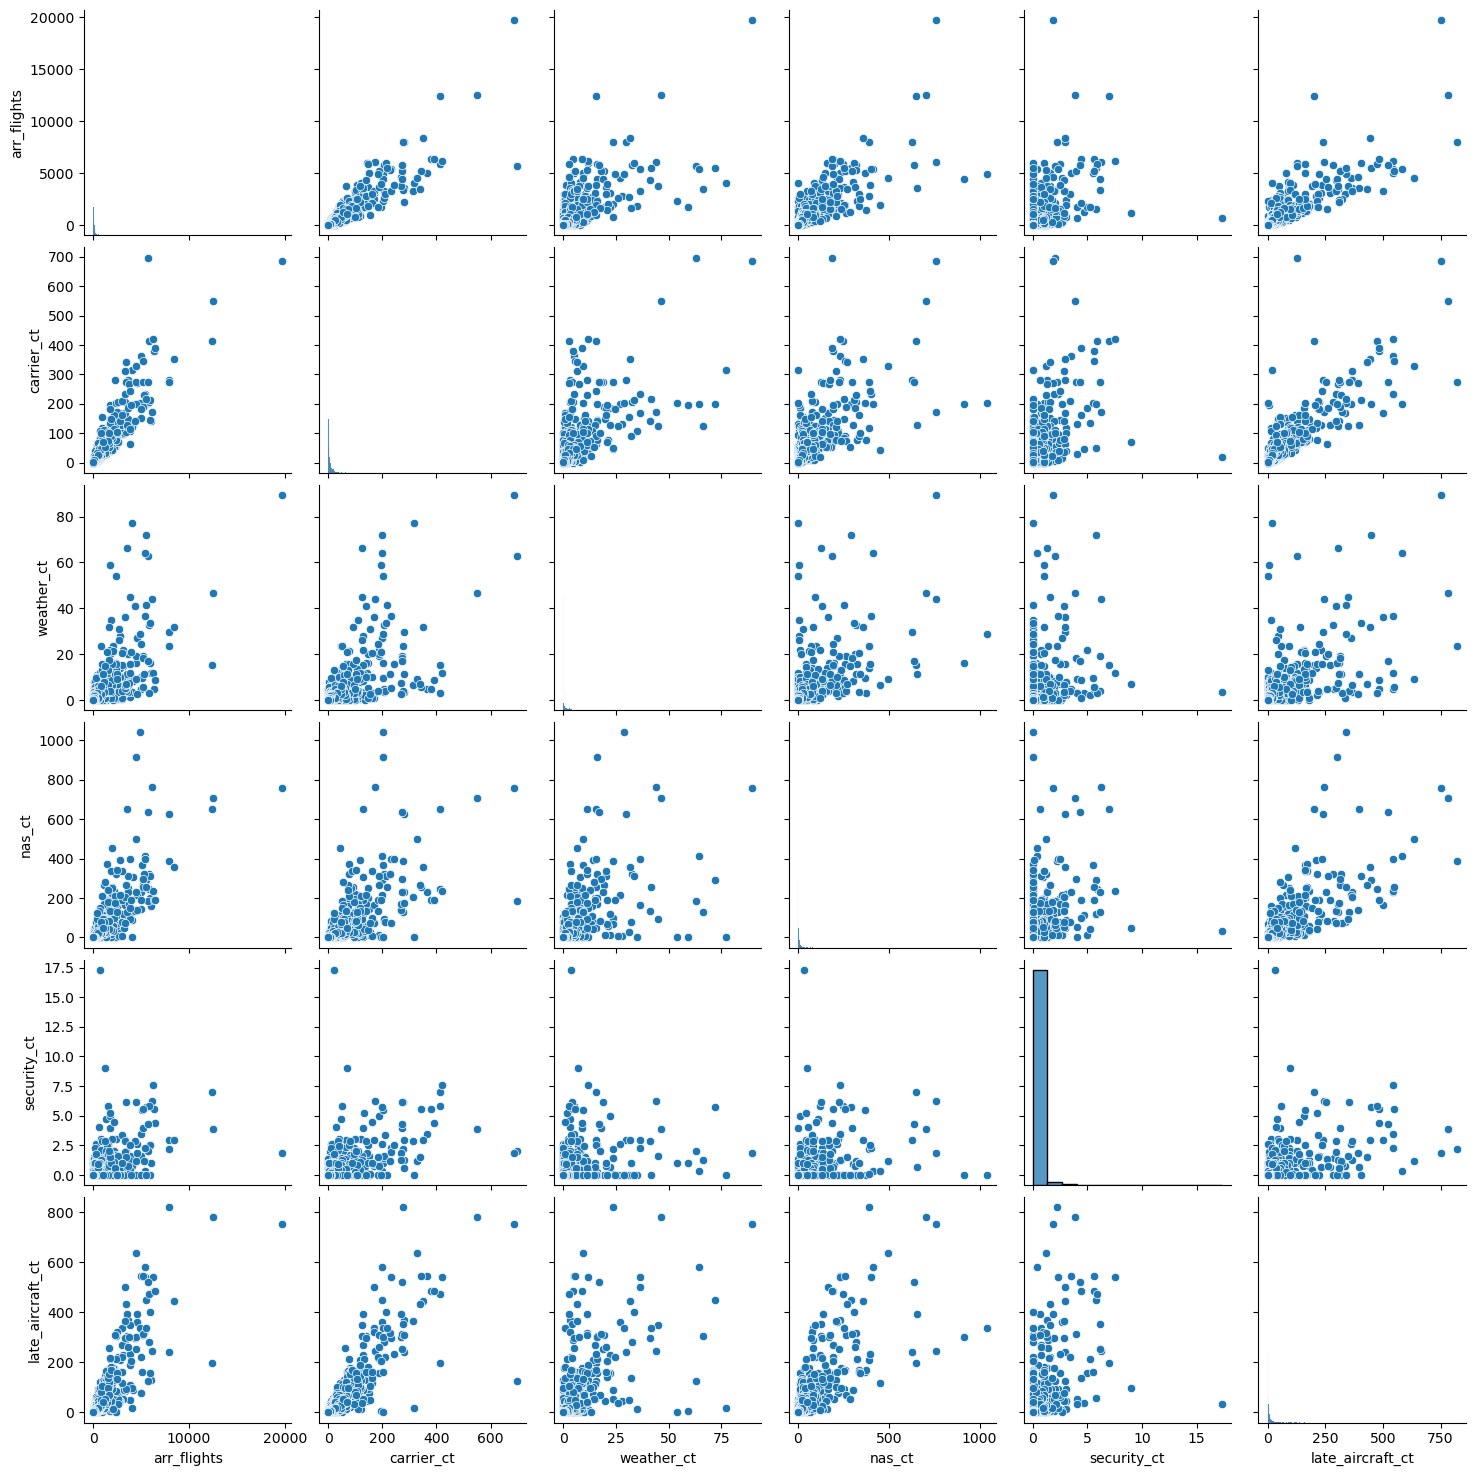

In [22]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [23]:
# Create another subset to use in a pair plot of total minutes of delay due to various reasons

sub_3 = sub[['arr_flights', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]

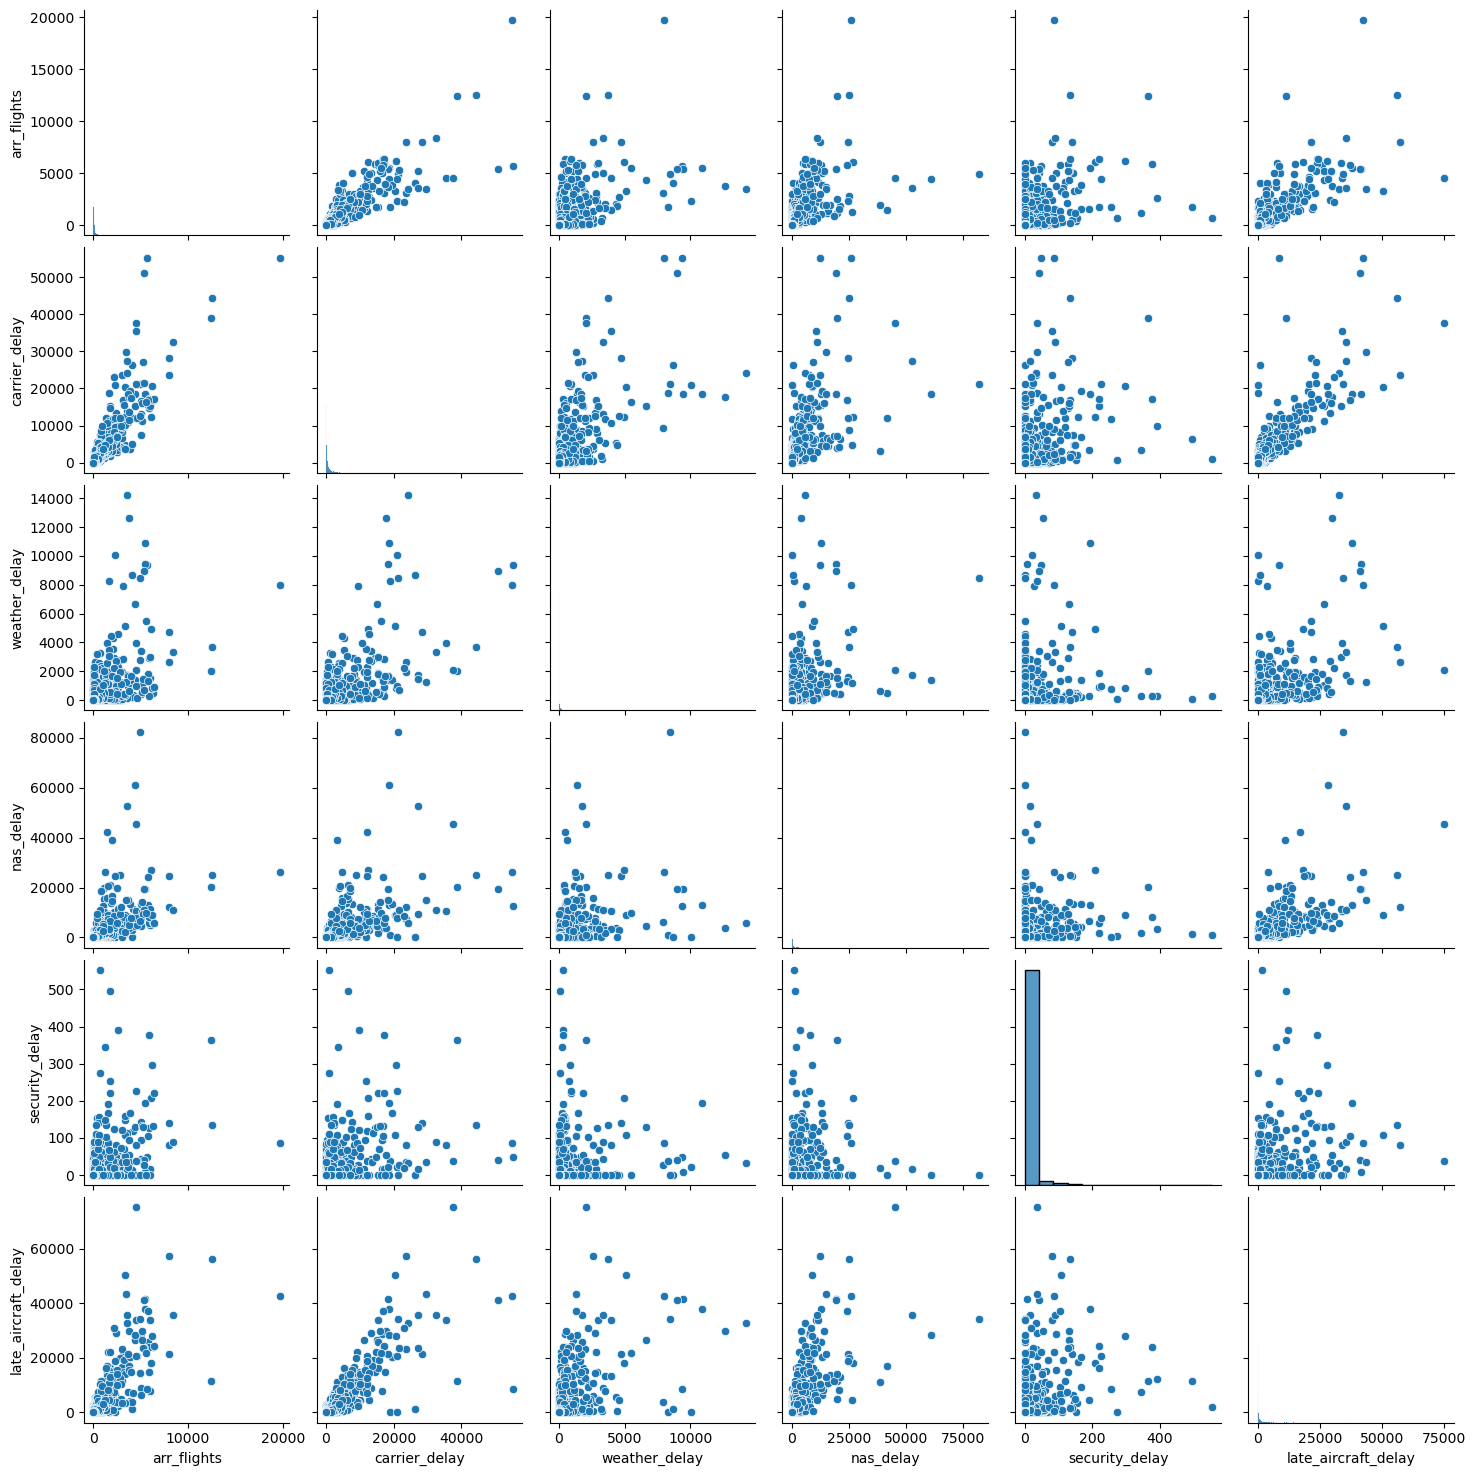

In [24]:
# Create a pair plot 

h = sns.pairplot(sub_3)

While most of these scatter plots look fairly similar, I am most interested in the number of arriving flights causing more delays based on any factor. I will be sorting out arr_flights into categories and crossing it with various delay factors to see how it breaks down into Categorical Plots. 

### 5. Create a categorical plot 

<Axes: xlabel='arr_flights', ylabel='Count'>

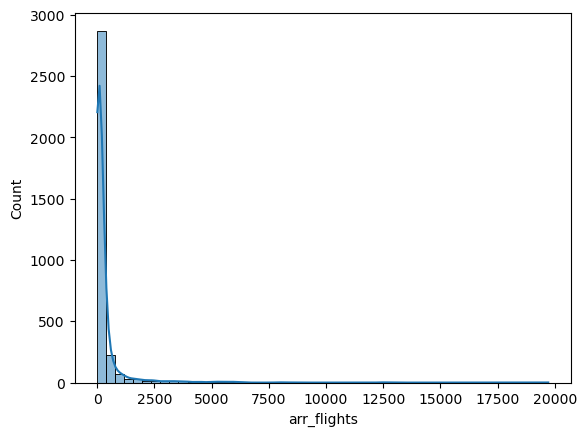

In [25]:
# Use a histogram to visualize the distribution of arr_flights

sns.histplot(delay['arr_flights'], bins = 50, kde = True)

In [26]:
# Check 'arr_flights' statistics

delay['arr_flights'].describe()

count     3343.000000
mean       298.271014
std        852.436335
min          1.000000
25%         35.000000
50%         83.000000
75%        194.500000
max      19713.000000
Name: arr_flights, dtype: float64

#### Create 'arr_flights' categories

In [6]:
delay.loc[delay['arr_flights'] < 298, 'Arrival category'] = 'Low Arrivals'

In [7]:
delay.loc[(delay['arr_flights'] >= 298) & (delay['arr_flights'] < 1150), 'Arrival category'] = 'Average Arrivals'

In [8]:
delay.loc[delay['arr_flights'] >= 1150, 'Arrival category'] = 'High Arrivals'

In [9]:
delay['Arrival category'].value_counts(dropna = False)

Arrival category
Low Arrivals        2752
Average Arrivals     416
High Arrivals        175
Name: count, dtype: int64

In [31]:
# Check column was added

delay.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'city_state',
       'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
       'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay',
       'Arrival category'],
      dtype='object')

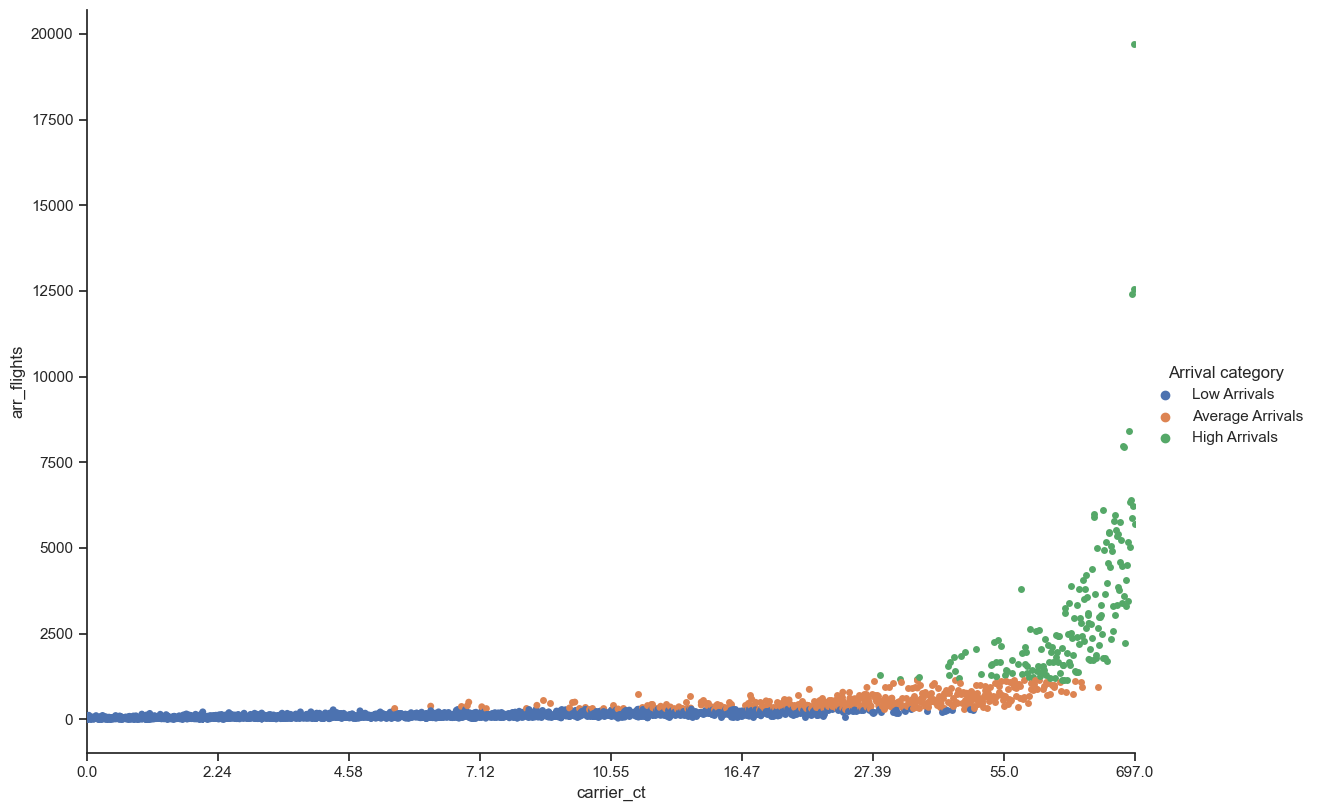

In [52]:
# Create a categorical plot in seaborn using the arrival categories created above

sns.set(style="ticks")
g = sns.catplot(x="carrier_ct", y="arr_flights", hue="Arrival category", data=delay, height=8.27, aspect=11.7/8.27)
g.ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator())

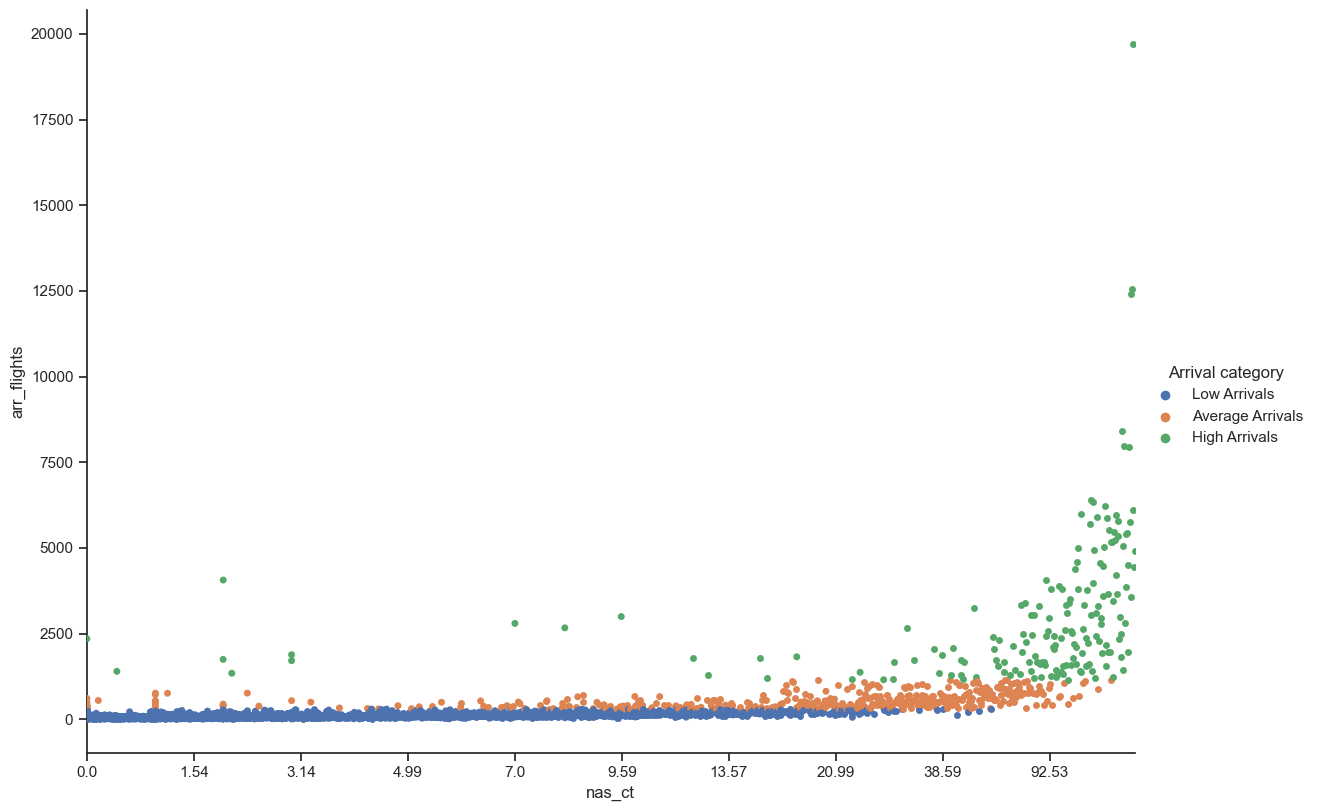

In [53]:
# Create a categorical plot in seaborn using the arrival categories created above

sns.set(style="ticks")
g = sns.catplot(x="nas_ct", y="arr_flights", hue="Arrival category", data=delay, height=8.27, aspect=11.7/8.27)
g.ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator())

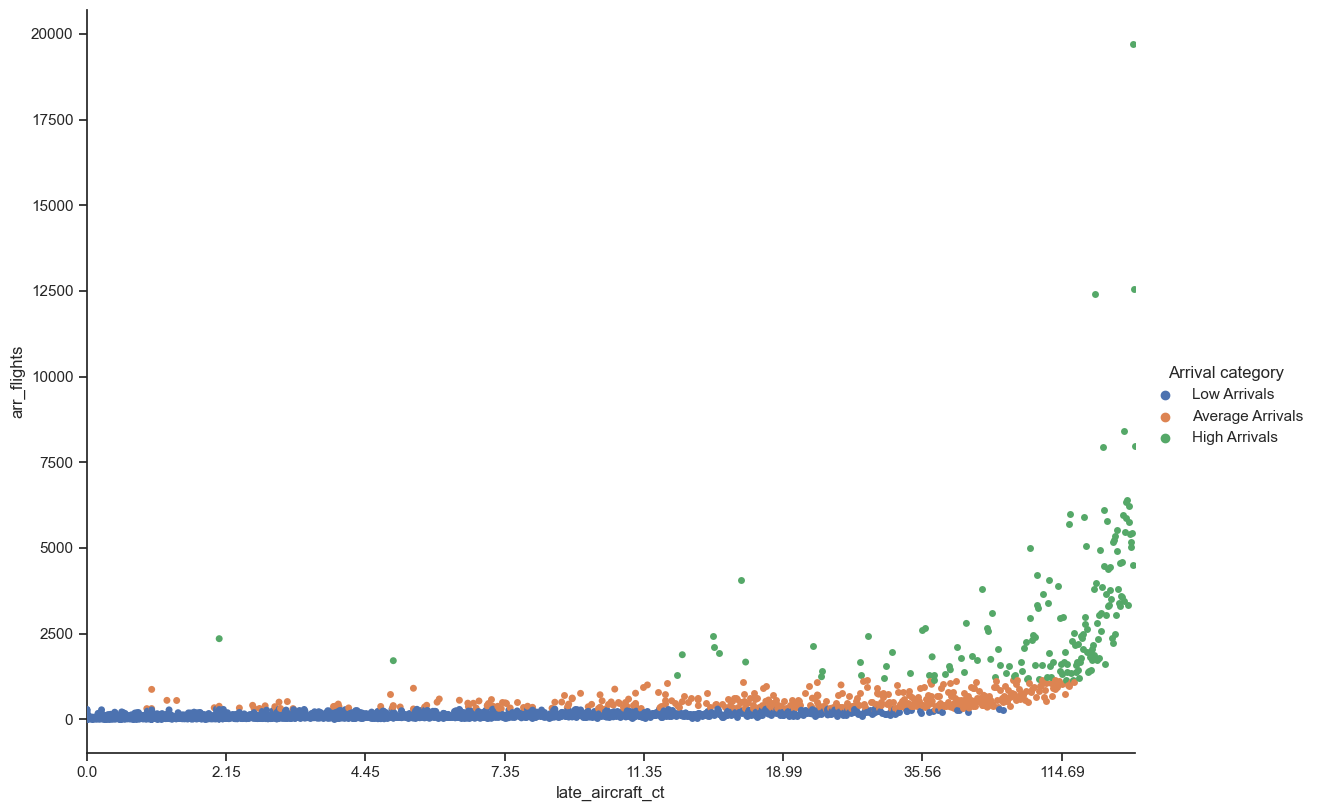

In [54]:
# Create a categorical plot in seaborn using the arrival categories created above

sns.set(style="ticks")
g = sns.catplot(x="late_aircraft_ct", y="arr_flights", hue="Arrival category", data=delay, height=8.27, aspect=11.7/8.27)
g.ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator())

I've analyzed 3 contributing factors to causing flight delays, these are 1. Delayed due to Air Carrier "carrier_ct", 2. Delayed due to National Aviation System "nas_ct" and 3. Delayed as a result of another flight on the same aircraft delayed "late_aircraft_ct". 
For the first delay factor, "carrier_ct", in general, the higher number of arrivals, the more likely there is to be a delay. However, there are many instances where a low number of arrivals also leads to an increase in delays.
In the next 2 cat plots, we see the same trend of high arrivals leading to increased delays and numerous instances where low number of arrivals still leads to increased delays. However, there are a few outliers where a high number of arrivals does not have an expectedly high number of delays. 

Do more incoming flights lead to more delays?
As of now I would say, on average, the answer is yes. More incoming flights lead to more delays overall, however, there are instances where this is not the case, i.e. low arrival numbers leading to increased delays.

Hypothesis: An increase in incoming flights leads to an increase in delayed flights

In [10]:
# Export sub df
delay.to_csv(os.path.join(path, 'delay_with_arrival_cat.csv'))